In [45]:
import pandas as pd

# Carga del dataset
data = pd.read_csv('Mall_Customers.csv')

data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Resumen estadístico
data.describe()

# Información sobre valores nulos
data.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

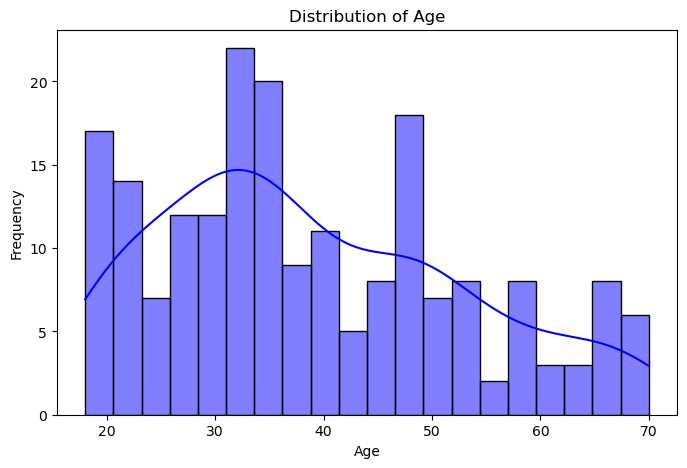

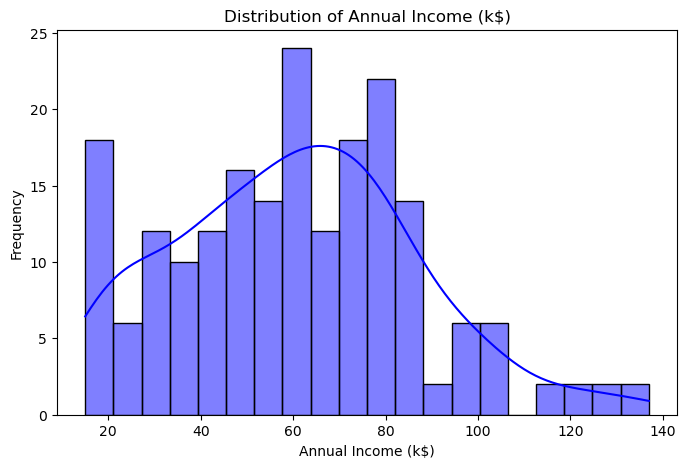

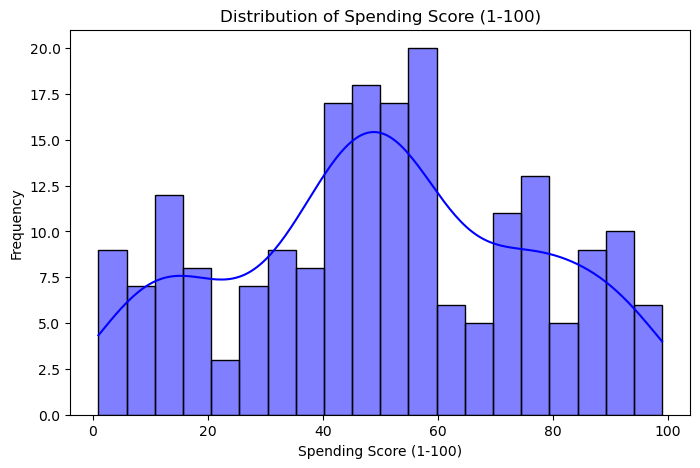

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Distribuciones
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


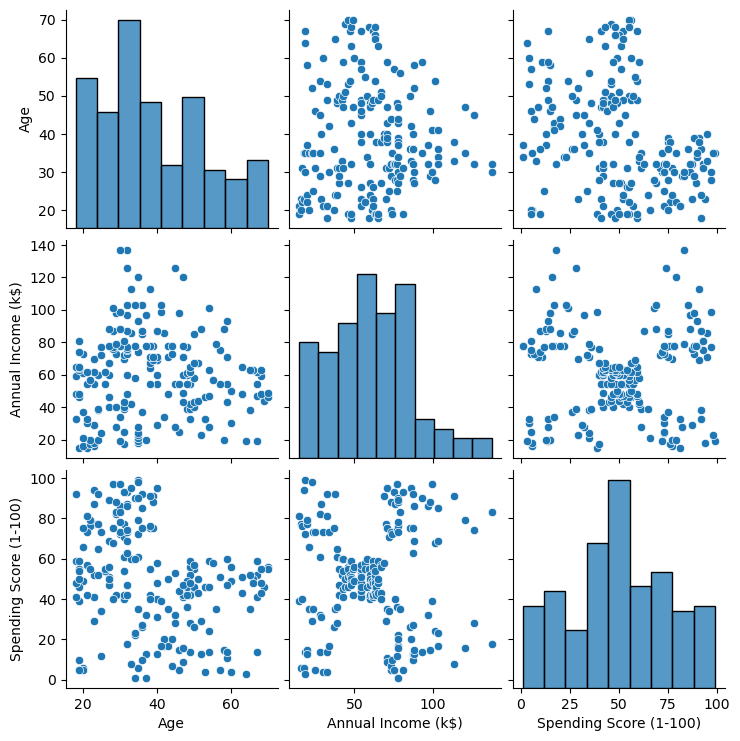

In [7]:
# Pares de dispersión
sns.pairplot(data[numeric_columns])
plt.show()

In [47]:
from sklearn.preprocessing import LabelEncoder

# Codificación de la columna 'Gender'
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Verificar los cambios
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


DENDOGRAMA

In [15]:
# Seleccionar columnas relevantes para clustering
features_for_clustering = data.drop(columns=['CustomerID', 'Cluster'], errors='ignore')


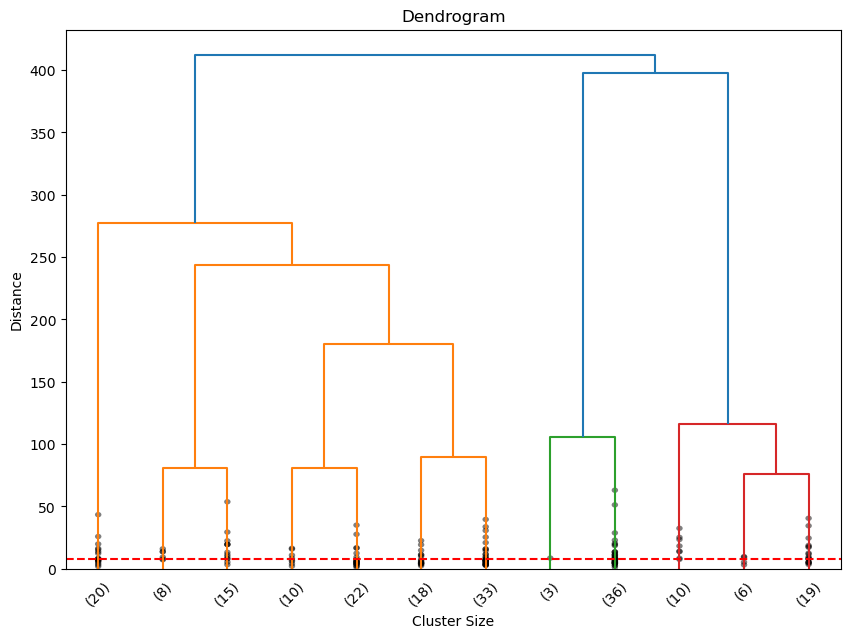

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Calcular distancias y construcción del dendrograma
linked = linkage(features_for_clustering, method='ward')  # Usamos el método de Ward

# Plotear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title('Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=8, color='r', linestyle='--')  # Línea horizontal para sugerir número de clusters
plt.show()


In [51]:
from sklearn.cluster import AgglomerativeClustering

# Entrenar el modelo con el número óptimo de clusters
optimal_clusters = 5
model = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
cluster_labels = model.fit_predict(features_for_clustering)



In [23]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de Silhouette
silhouette_avg = silhouette_score(features_for_clustering, cluster_labels)
print(f'Coeficiente de Silhouette: {silhouette_avg}')


Coeficiente de Silhouette: 0.43997527212476695


In [55]:
from sklearn.metrics import calinski_harabasz_score

# Calcular el índice de Calinski
calinski_harabasz = calinski_harabasz_score(features_for_clustering, cluster_labels)
print(f'Índice de Calinski: {calinski_harabasz}')


Índice de Calinski: 147.5797229271367


In [87]:
data['Cluster'] = cluster_labels


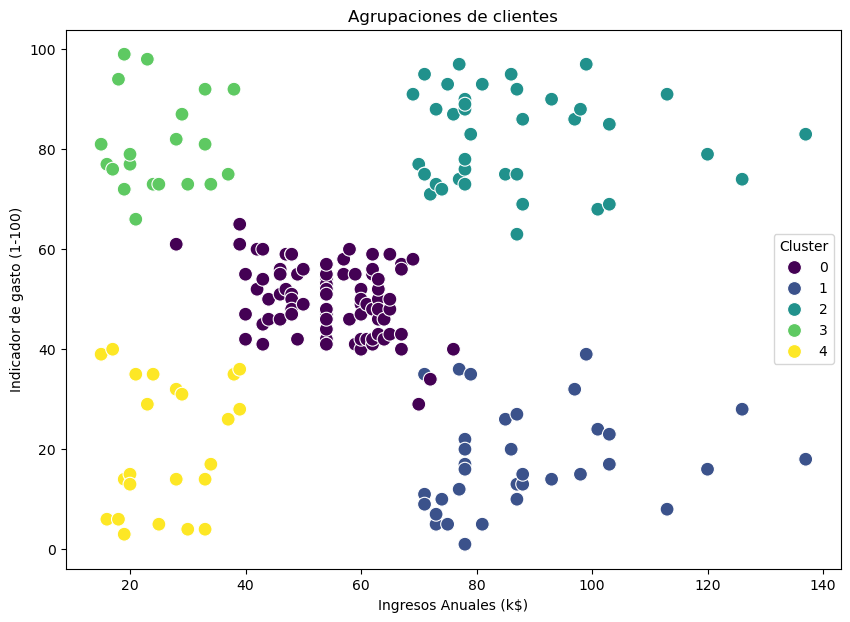

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data['Annual Income (k$)'], 
    y=data['Spending Score (1-100)'], 
    hue=data['Cluster'], 
    palette='viridis', 
    s=100
)
plt.title('Agrupaciones de clientes')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Indicador de gasto (1-100)')
plt.legend(title='Cluster')
plt.show()

